In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sta1_data = pd.read_csv('./results-test1/processed_1.csv')
sta1_data.head()

,timestamp,bufferLevel,frameRate,bitrate,resolution,calculatedBitrate,CPU_use,RAM_filled,Net_bytes_sent,Net_bytes_received,Disk_IO_percentage,Packets_sent,Packets_received
0,2022-12-15 08:42:48,0.000,18,629,426x240,0,22.4,1226944512,346812939,363988860,0.008174,45310,54410
1,2022-12-15 08:42:49,0.000,18,629,426x240,0,23.2,1227472896,347060610,364117784,0.008174,45448,54545
2,2022-12-15 08:42:50,0.000,18,629,426x240,0,24.7,1231908864,347310157,364248729,0.008168,45599,54692
3,2022-12-15 08:42:51,3.996,18,629,426x240,89,21.7,1234448384,347557917,364374207,0.008168,45737,54827
4,2022-12-15 08:42:52,3.204,18,629,426x240,111,52.1,1341329408,347803573,364500995,0.008159,45861,54949


In [3]:
X = sta1_data.loc[:, 'CPU_use':].to_numpy()
buffer_level = sta1_data['bufferLevel'].to_numpy()
calculated_bitrate = sta1_data['calculatedBitrate'].to_numpy()

Text(0.5, 1.0, 'calculated bitrate')

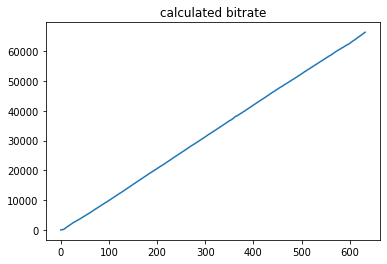

In [4]:
plt.plot(range(0, len(buffer_level)), calculated_bitrate)
plt.title('calculated bitrate')

Text(0.5, 1.0, 'buffer Level')

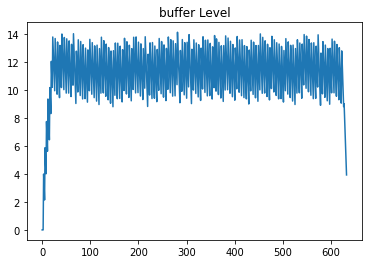

In [5]:
plt.plot(range(0, len(buffer_level)), buffer_level)
plt.title('buffer Level')

### Train model

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

In [7]:
X_processed = StandardScaler().fit_transform(X)

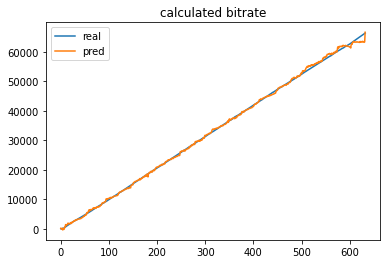

In [8]:
model = MLPRegressor(max_iter=100000).fit(X_processed, calculated_bitrate)
y_pred = model.predict(X_processed)
plt.plot(range(0, len(calculated_bitrate)), calculated_bitrate, label='real')
plt.plot(range(0, len(calculated_bitrate)), y_pred, label='pred')
plt.title('calculated bitrate')
plt.legend()

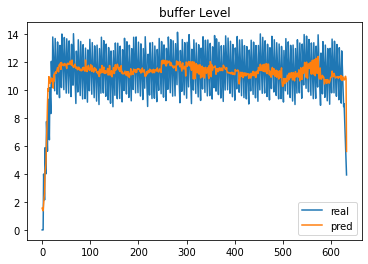

In [9]:
model = MLPRegressor(max_iter=100000).fit(X_processed, buffer_level)
y_pred = model.predict(X_processed)
plt.plot(range(0, len(calculated_bitrate)), buffer_level, label='real')
plt.plot(range(0, len(calculated_bitrate)), y_pred, label='pred')
plt.title('buffer Level')
plt.legend()

### Splitting dataset (400 train, rest test)

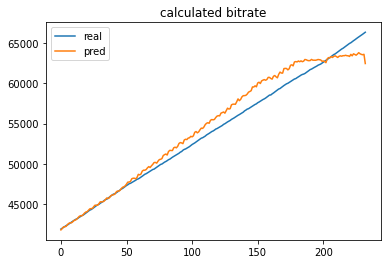

In [10]:
model = MLPRegressor(max_iter=100000).fit(X_processed[:400,:], calculated_bitrate[:400])
y_pred = model.predict(X_processed[400:,:])
plt.plot(range(0, len(calculated_bitrate[400:])), calculated_bitrate[400:], label='real')
plt.plot(range(0, len(calculated_bitrate[400:])), y_pred, label='pred')
plt.title('calculated bitrate')
plt.legend()

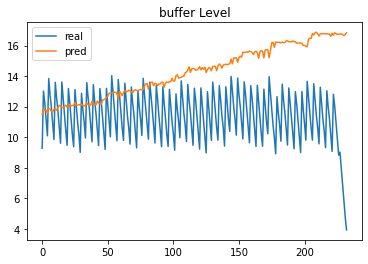

In [11]:
model = MLPRegressor(max_iter=100000).fit(X_processed[:400,:], buffer_level[:400])
y_pred = model.predict(X_processed[400:,:])
plt.plot(range(0, len(calculated_bitrate[400:])), buffer_level[400:], label='real')
plt.plot(range(0, len(calculated_bitrate[400:])), y_pred, label='pred')
plt.title('buffer Level')
plt.legend()